<a href="https://colab.research.google.com/github/zombig816/Statistics/blob/main/%D0%9A%D0%BB%D0%B0%D1%81%D1%82%D0%B5%D1%80%D0%BD%D1%8B%D0%B9_%D0%B0%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Кластерный анализ и метод главных компонент

##Методы кластеризации

###Зачем они нужны?

При помощи кластерного анализа мы научимся существует ли в наших данных подгруппы испытуемых и сколько таких групп. Этот метод также является одним из подходов "обучением без учителя".

##Метод K-средних

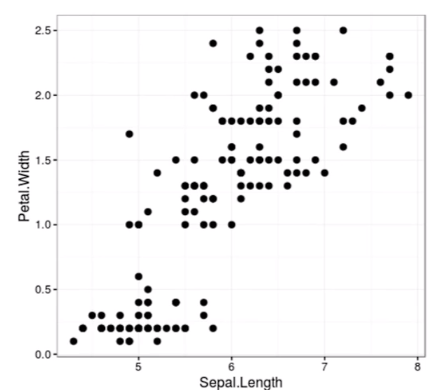

Возьмем для примера датасет с данными про цветки "ирис"
На данном графике мы видим как зависят друг от друга длина лепестка от ширины чашелистика

Мы можем предположить, что некоторые точки группируются в левой нижней части графика

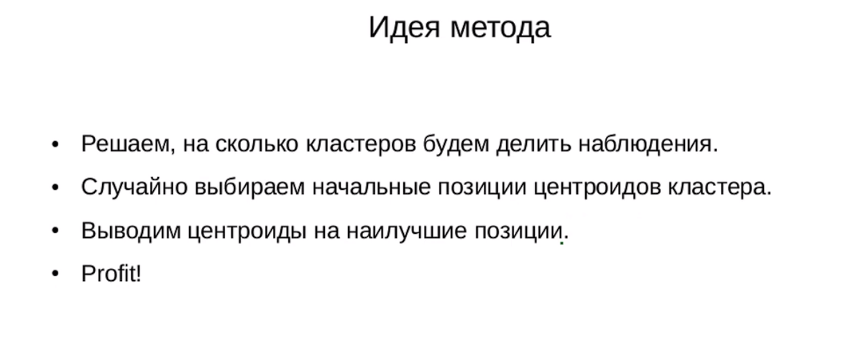

Теперь нужно понять, что такое центроида


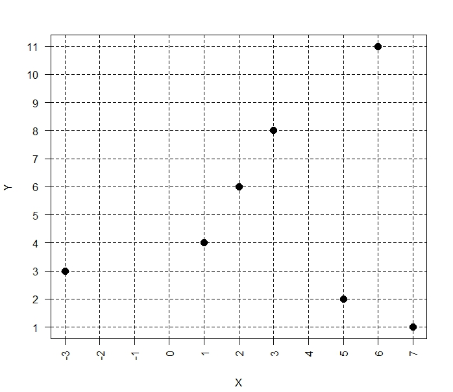

Считаем средние значения координат X и Y

$$\overline{x} = {-3 + 1 + 2 + 3 + 5+ 6+ 7 \over7} = 3$$

$$\overline{y} = {1+2+3+4+6+8+11 \over7} = 5$$

Координаты центроиды $${(3, 5)}$$

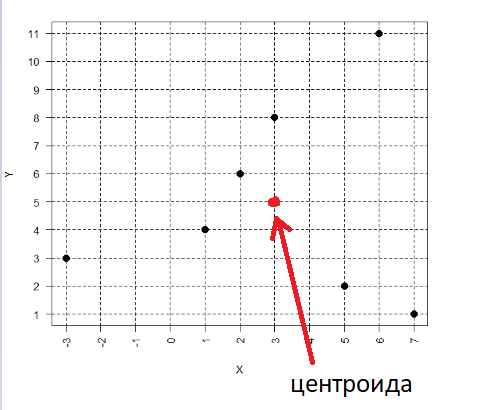

###Суть метода

Представим, что у нас есть вот такие данные

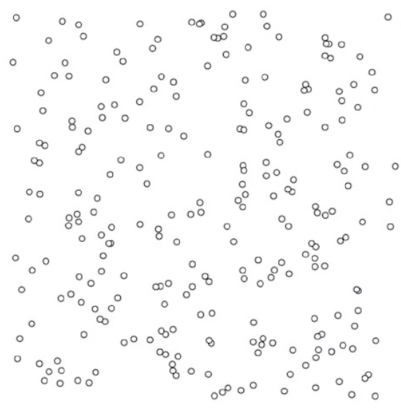

В методе k-means мы должны указать, какое количество кластеров(групп) мы хотим выделить

Пусть k = 5

Случайным образом кидаем на наши данные 5 точек(центроидов)

1) Делим точки на цвета

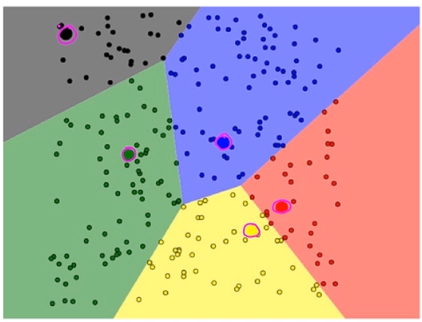

Как мы поделили области на цвета:

Желтые точки ближе всего к желтому центроиду, красные - к красному и.т.д.

2) Теперь передвигаем центроиды в оптимальное положение, при этом для каждой центроиды учитываем точки только ее цвета:

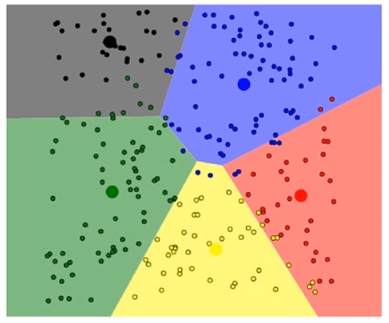

# Что мы видим?

Принадлежность точек к цветам изменилась!!!

Что делаем дальше?

3) Обновляем принадлежность точек к цветам, то есть перекрашиваем точки, которые теперь принадлежат другому цвету

Теперь мы должны повторить шаги 2-3

# До каких пор повторяем эти шаги?

Ответ: пока после очередного обновления центроидов ни одна точка не поменяет свою принадлежность

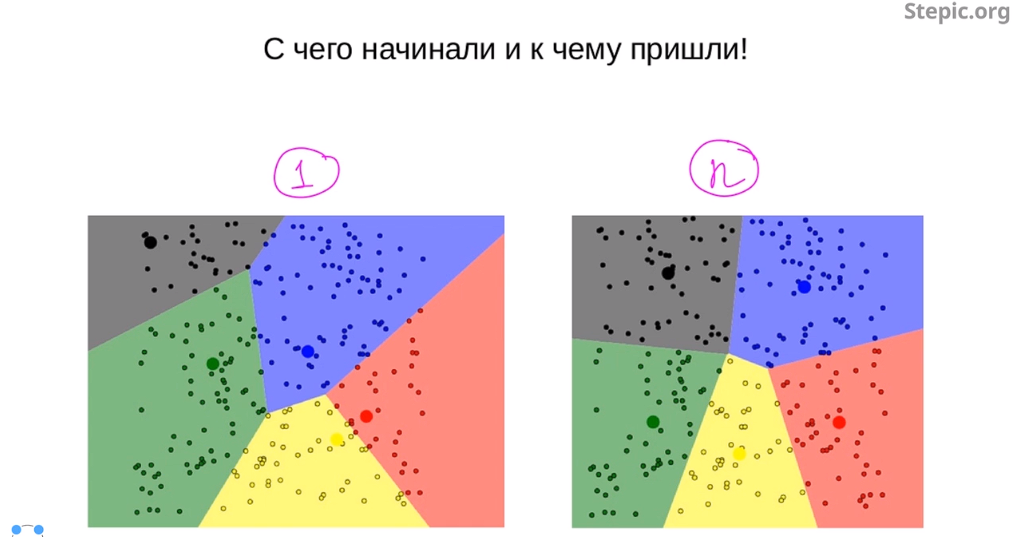

Чтобы окончательно понять принцип работы алгоритма, посмотрим на визуализацию https://www.naftaliharris.com/blog/visualizing-k-means-clustering/

#Но есть проблема



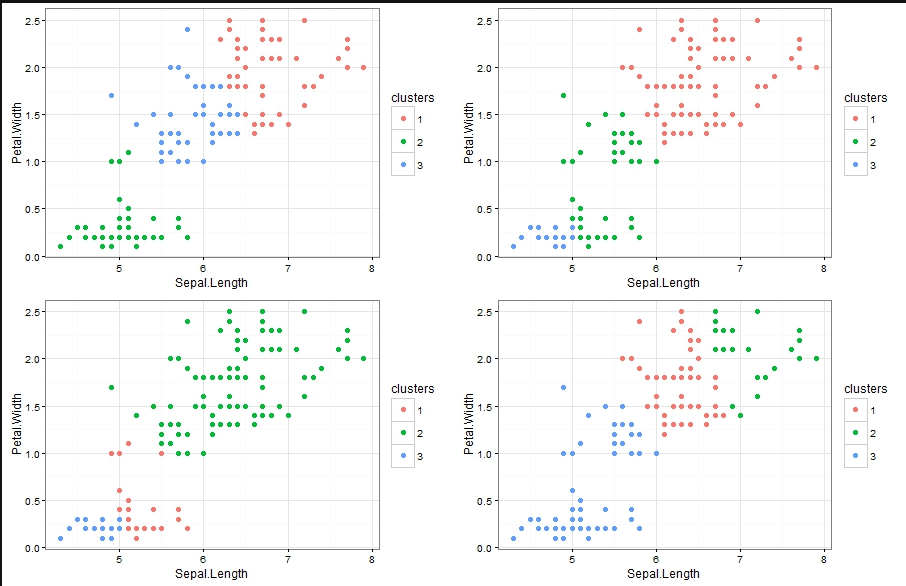

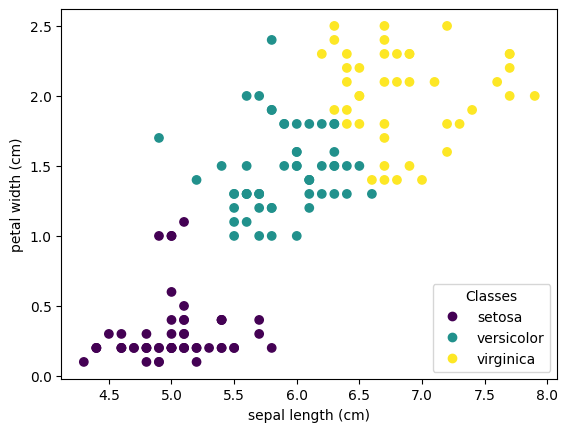

In [ ]:
from sklearn import datasets
from sklearn import cluster
import matplotlib.pyplot as plt
# загрузка датасета
iris = datasets.load_iris()
# инициализация алгоритма
kmeans = cluster.KMeans(n_clusters=3, random_state=1, n_init="auto")
# обучение на столбцах 'sepal length' и 'petal width'
kmeans.fit(iris.data[:, (0, 3)])
# получение лейблов
iris_labels = kmeans.labels_
# отрисовка графики
_, ax = plt.subplots()
scatter = ax.scatter(iris.data[:, 0], iris.data[:, 3], c=iris_labels)
ax.set(xlabel=iris.feature_names[0], ylabel=iris.feature_names[3])
_ = ax.legend(
    scatter.legend_elements()[0], iris.target_names, loc="lower right", title="Classes"
)

#Есть еще одна проблема


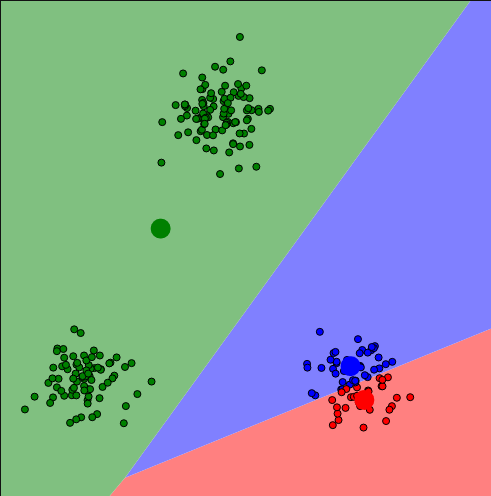

#Вывод: алгоритм иногда сходится не совсем удачным образом

##Возможное решение этих проблем: расставлять центроиды изначально не рандомно, а, например, максимально отдалив их друг от друга

.


##Еще одно возможное решение: прогнать алгоритм много много раз. Если в большинстве случаев кластеры распределились одинаково, то можем действительно утверждать, что в данных можно выделить кластеры

#Как выбрать оптимальное число кластеров?

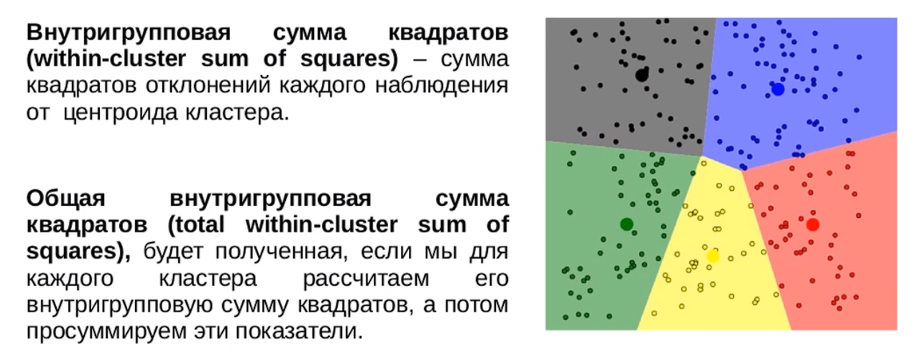

Если добавление еще одного кластера в наши данные значительно понижает общую сумму квадратов, то в увеличении числа кластеров есть смысл

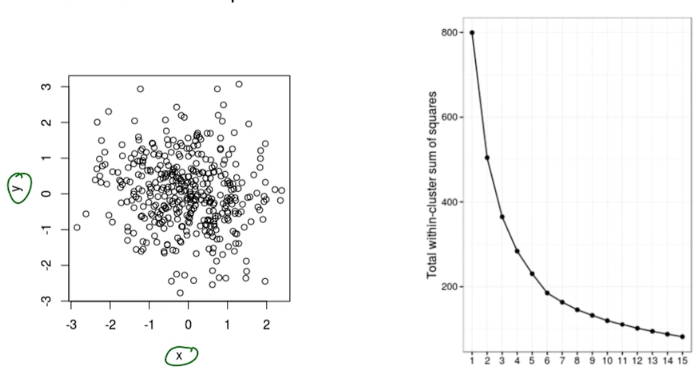

По данному графику мы видим, что в кластеризации в данном случае смысла особо нет

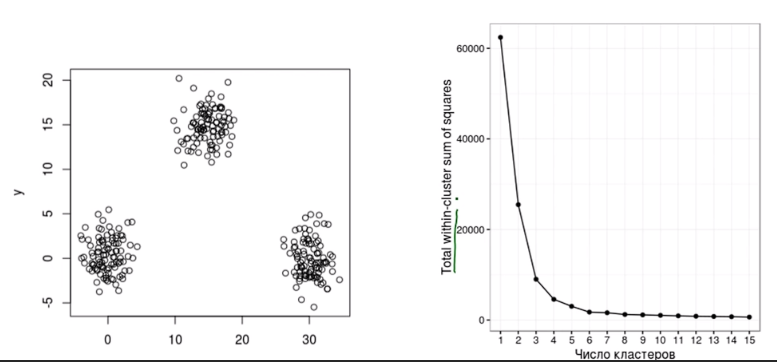

А в этом случае график уже не такой плавный, есть явно выраженная кластеризация

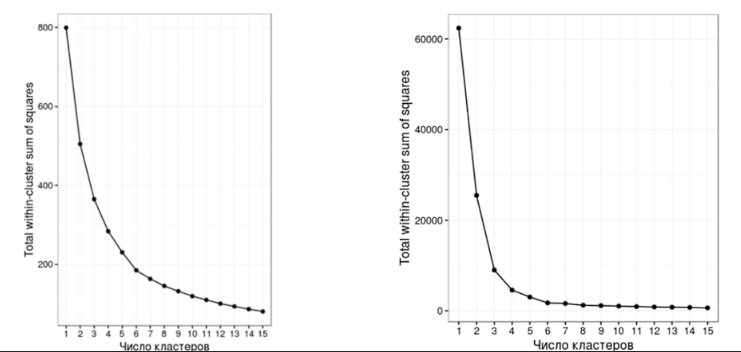

Сравним графики

Вывод: надо брать точку, на которой происходит резкое уменьшение общего числа квадратов. Брать больше кластеров - плохо. Если резкого уменьшения не наблюдается, в кластеризации смысла нет

#Метод ближайших соседей (Иерархическая кластеризация)

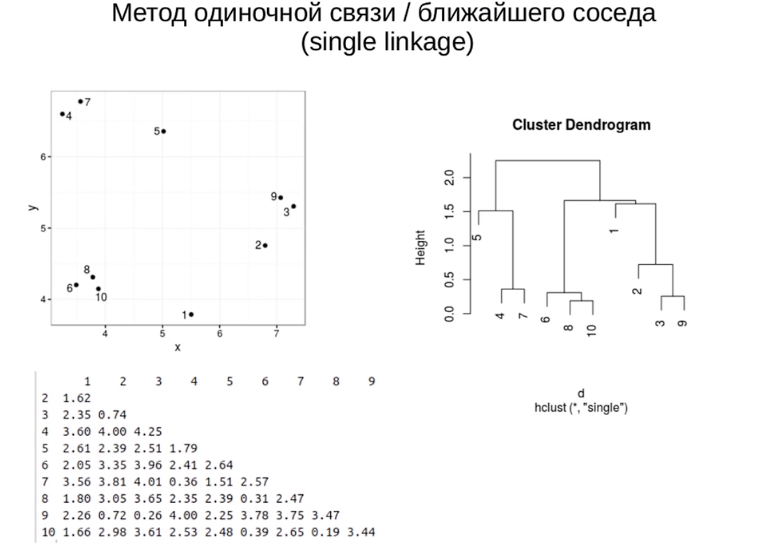

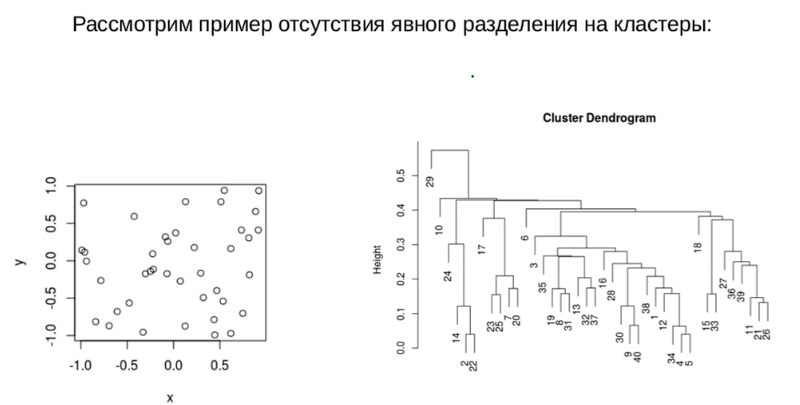

Признак того, что ничего хорошего из кластеризации не выйдет - большое количество маленьких кластеров

#Метод анализа главных компонент

Часто бывает такое, что данные избыточны и их надо обработать

В этом нам может помочь метод анализа главных компонент

Если между двумя предикторами(переменными) есть сильная корреляция, то мы можем заменить их одним предиктором(переменной)

При этом, мы, конечно же, потеряем часть информации, но очень часто на практике возникают ситуации, когда нужно объединить некоторые переменные в одну

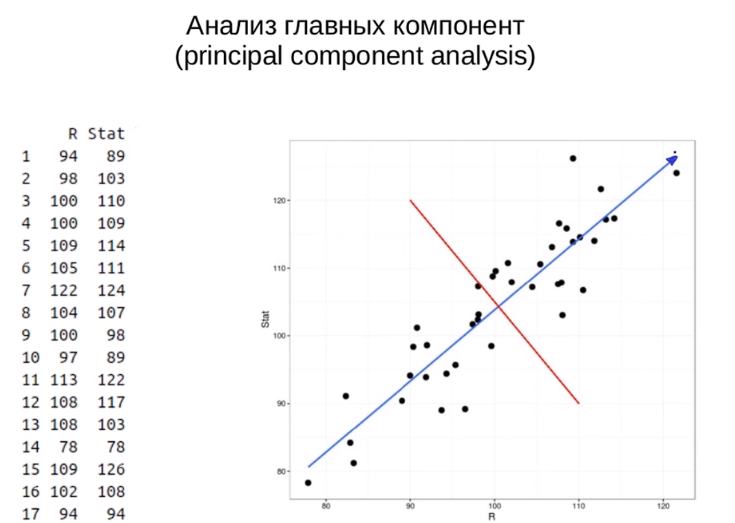

Синяя ось - главная компонента 1 - является, по сути, линией регрессии

Красная ось, соответственно, главная компонента 2, характеризует изменчивость данных вдоль синей оси

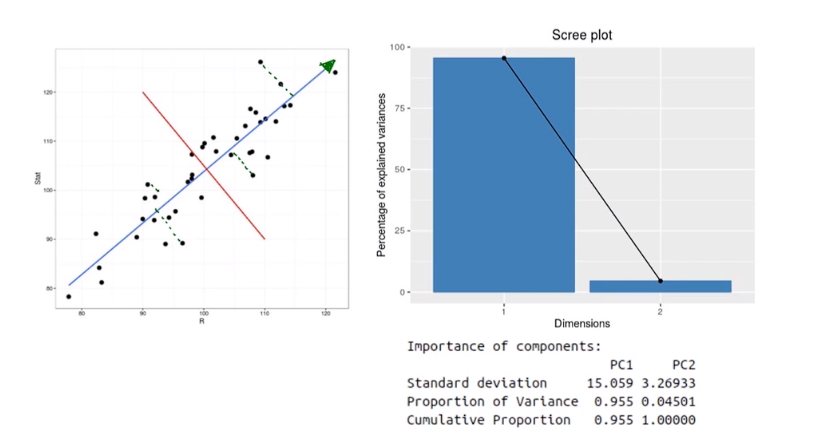

Как мы можем видеть по Scree Plot, синяя ось объясняет 95,5% изменчивости данных, а красная - около 5%

Этими 5% мы можем пренебречь

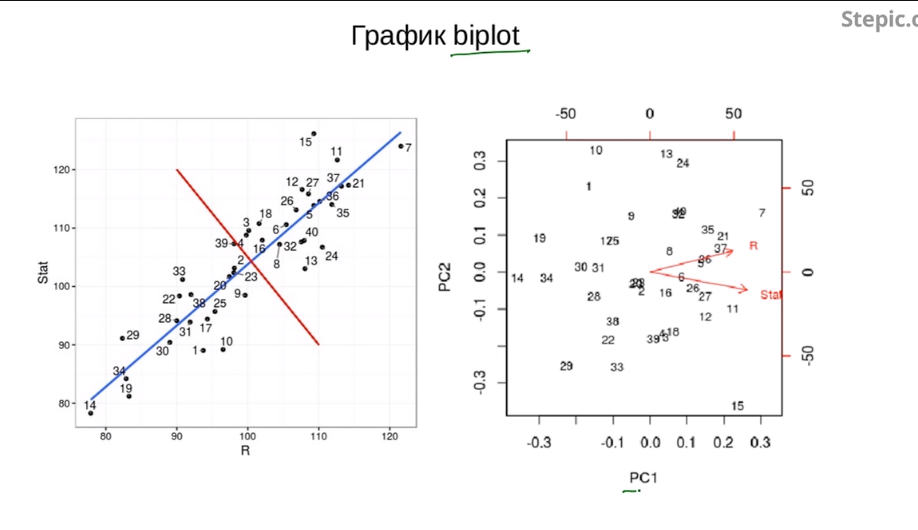

Построим биплот (переход к новым осям)

Судя по углу между осями R и Stat на втором графике, мы можем утверждать, что между ними довольно сильняя корреляция (если бы угол был тупой, то корреляция стремилась бы к -1)

Также мы видим, что направление осей R и Stat примерно совпадает с направлением главной компоненты 1(синяя ось), значит PC1 довольно хорошо описывает предикторы R и Stat

##Итог

По проведенному нами анализу мы можем заменить 2 предиктора R и Stat одним PC1, потеряв при этом всего около 5% информации

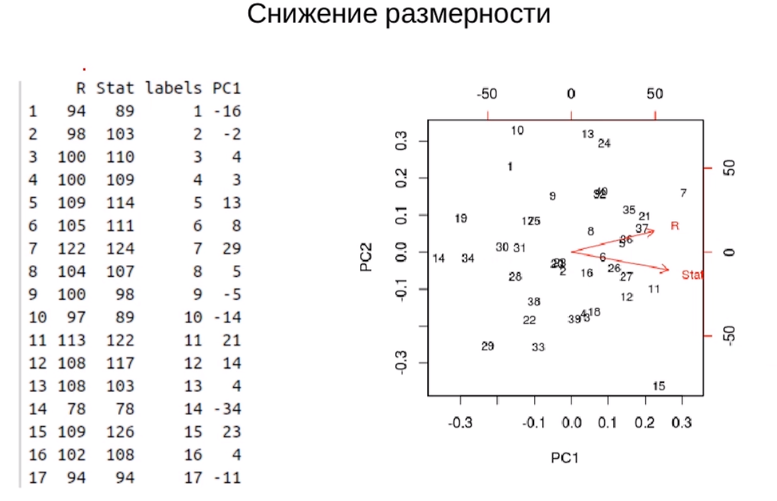

##Вопрос: Можем ли мы одной новой переменной описать сразу несколько старых?

Ответ: Да, можем :)

Возьмем для примера датасет (Swess, встроена в R) с различной информацией про провинции Швейцарии (наличие детей в семье, процент мужчин вовлеченных в сельское хозяйство, 2 переменные про уровень образованности, процент католиков, показатель детской смертности)

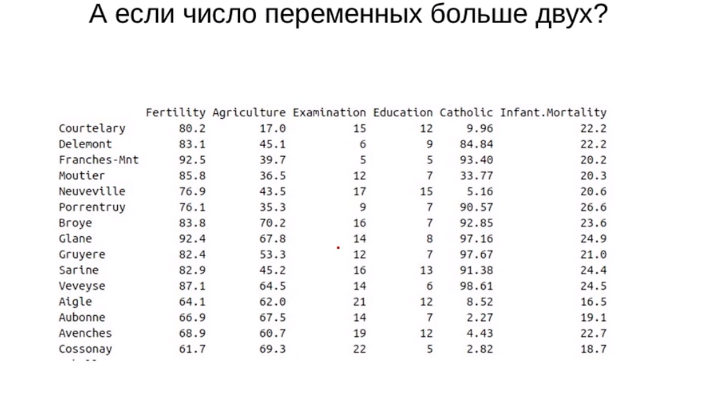

Построим Scree PLot

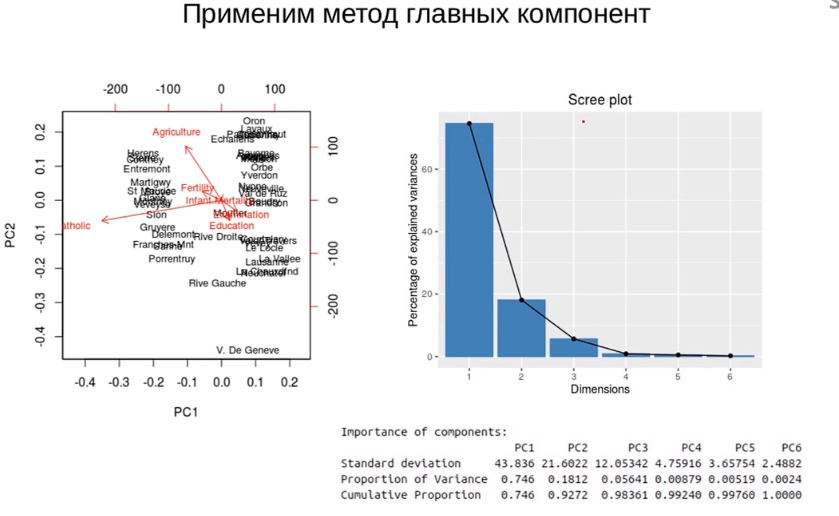

Что мы видим?

Всего две главные компоненты описывают 92% изменчивости всех наших данных

В итоге от 6 предикторов мы перешли к двум и видим красивый график на плоскости

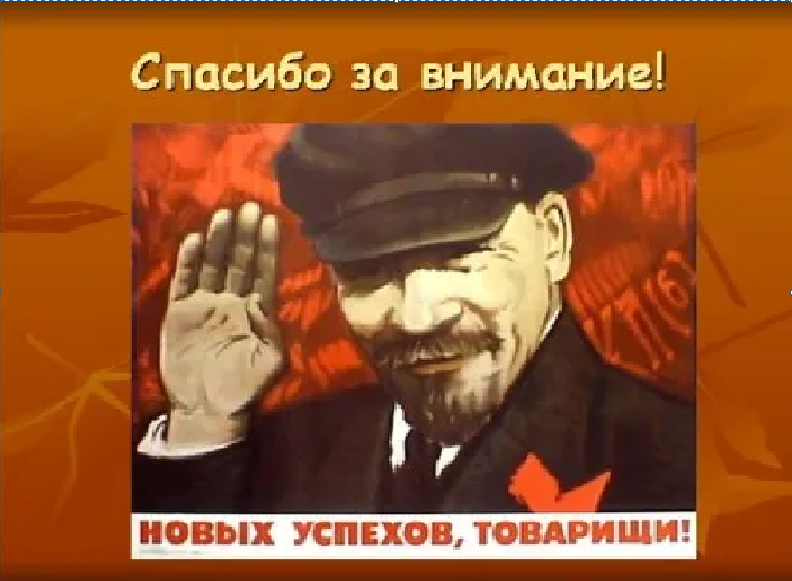